# Dataset

### First exploratory analysis

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [28]:
df = pd.read_csv('/Users/alessandrasellini/code/projects/snake_conservation_status/raw_data/ConservationStatusofWorldSnakes.csv')
df

,Family,Scientific name,Common name(s),Red List status,Population trend
0,BOLYERIDAE,Bolyeria multocarinata,Round Island Burrowing Boa,EX,NaN
1,DIPSADIDAE,Borikenophis sanctaecrucis,Saint Croix Racer,EX,NaN
2,TYPHLOPIDAE,Typhlops cariei,NaN,EX,NaN
3,ELAPIDAE,Aipysurus apraefrontalis,"Sahul Reef Snake, Short-nosed Sea Snake",CR,decreasing
4,ELAPIDAE,Aipysurus foliosquama,Leaf-scaled Sea Snake,CR,decreasing
...,...,...,...,...,...
244,TYPHLOPIDAE,Typhlops syntherus,Barahona Peninsula Blindsnake,NT,unknown
245,VIPERIDAE,Vipera barani,NaN,NT,decreasing
246,VIPERIDAE,Vipera lotievi,Lotiev's Viper,NT,decreasing
247,VIPERIDAE,Vipera monticola,Atlas Dwarf Viper,NT,decreasing


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Family            249 non-null    object
 1   Scientific name   249 non-null    object
 2   Common name(s)    174 non-null    object
 3   Red List status   249 non-null    object
 4   Population trend  219 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [59]:
families = df.drop(columns=['Common name(s)', 'Scientific name'])
families

,Family,Red List status,Population trend
0,BOLYERIDAE,EX,NaN
1,DIPSADIDAE,EX,NaN
2,TYPHLOPIDAE,EX,NaN
3,ELAPIDAE,CR,decreasing
4,ELAPIDAE,CR,decreasing
...,...,...,...
244,TYPHLOPIDAE,NT,unknown
245,VIPERIDAE,NT,decreasing
246,VIPERIDAE,NT,decreasing
247,VIPERIDAE,NT,decreasing


In [60]:
families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Family            249 non-null    object
 1   Red List status   249 non-null    object
 2   Population trend  219 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [61]:
families.fillna(value='(possibly) extinct', inplace=True)
families

,Family,Red List status,Population trend
0,BOLYERIDAE,EX,(possibly) extinct
1,DIPSADIDAE,EX,(possibly) extinct
2,TYPHLOPIDAE,EX,(possibly) extinct
3,ELAPIDAE,CR,decreasing
4,ELAPIDAE,CR,decreasing
...,...,...,...
244,TYPHLOPIDAE,NT,unknown
245,VIPERIDAE,NT,decreasing
246,VIPERIDAE,NT,decreasing
247,VIPERIDAE,NT,decreasing


In [62]:
families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Family            249 non-null    object
 1   Red List status   249 non-null    object
 2   Population trend  249 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [63]:
families.value_counts()

Family              Red List status  Population trend  
VIPERIDAE           VU               decreasing            12
COLUBRIDAE          NT               decreasing             8
VIPERIDAE           EN               decreasing             8
                                     unknown                8
                    NT               decreasing             8
                                                           ..
LAMPROPHIIDAE       VU               unknown                1
NATRICIDAE          CR               (possibly) extinct     1
PROSYMNIDAE         CR               unknown                1
PSEUDOXYRHOPHIIDAE  CR               decreasing             1
XENOSAURIDAE        VU               decreasing             1
Length: 91, dtype: int64

In [67]:
status = families.groupby(['Red List status']).value_counts()
status

Red List status  Family         Population trend  
CR               VIPERIDAE      decreasing            5
                 DIPSADIDAE     (possibly) extinct    2
                 COLUBRIDAE     unknown               2
                 ELAPIDAE       decreasing            2
                 COLUBRIDAE     (possibly) extinct    2
                                                     ..
VU               PYTHONIDAE     unknown               1
                                decreasing            1
                 HOMALOPSIDAE   decreasing            1
                 LAMPROPHIIDAE  unknown               1
                 XENOSAURIDAE   decreasing            1
Length: 91, dtype: int64

In [68]:
type(status)

pandas.core.series.Series

In [69]:
status = status.to_frame()
status

0
Red List status Family        Population trend     
CR              VIPERIDAE     decreasing          5
                DIPSADIDAE    (possibly) extinct  2
                COLUBRIDAE    unknown             2
                ELAPIDAE      decreasing          2
                COLUBRIDAE    (possibly) extinct  2
...                                              ..
VU              PYTHONIDAE    unknown             1
                              decreasing          1
                HOMALOPSIDAE  decreasing          1
                LAMPROPHIIDAE unknown             1
                XENOSAURIDAE  decreasing          1

[91 rows x 1 columns]

In [66]:
families.groupby(['Population trend']).value_counts().head(20)

Population trend    Family          Red List status
(possibly) extinct  DIPSADIDAE      EN                  5
                    ELAPIDAE        VU                  5
                    DIPSADIDAE      CR                  2
                    VIPERIDAE       VU                  2
                    COLUBRIDAE      CR                  2
                    BOLYERIDAE      EX                  1
                    CALAMARIIDAE    CR                  1
                    COLUBRIDAE      VU                  1
                    NATRICIDAE      CR                  1
                    XENODERMATIDAE  VU                  1
                    VIPERIDAE       CR                  1
                    TYPHLOPIDAE     VU                  1
                                    EX                  1
                                    EN                  1
                    PYTHONIDAE      EN                  1
                    DIPSADIDAE      VU                  1
                    

/Users/alessandrasellini/.pyenv/versions/3.10.6/envs/snake_conservation_status/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='Red List status', ylabel='Count'>

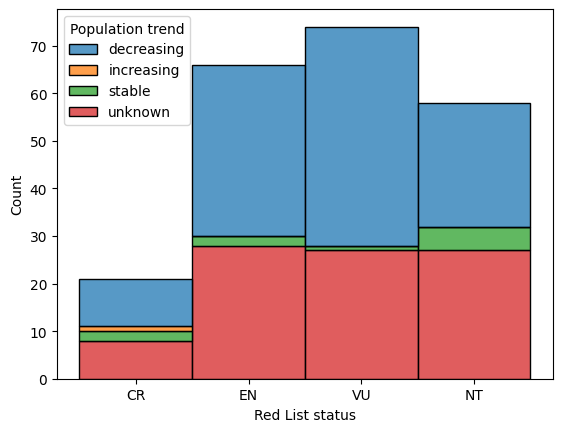

In [10]:
sns.histplot(df, x='Red List status', hue='Population trend', multiple='stack')

/Users/alessandrasellini/.pyenv/versions/3.10.6/envs/snake_conservation_status/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='Family', ylabel='Count'>

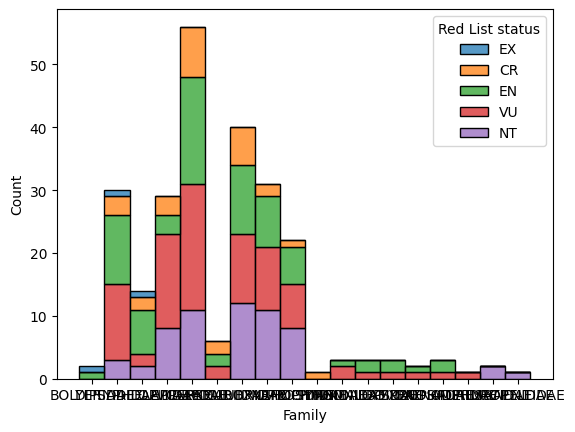

In [12]:
sns.histplot(df, x='Family', hue='Red List status', multiple='stack')

### Data pooling and further analysis